# Level 1: Exploring

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df_acct = pd.read_csv('data-set/completedacct.csv')
# df_card = pd.read_csv('data-set/completedcard.csv')
df_client = pd.read_csv('data-set/completedclient.csv')
df_disposition = pd.read_csv('data-set/completeddisposition.csv')
# df_district = pd.read_csv('data-set/completeddistrict.csv')
# df_loan = pd.read_csv('data-set/completedloan.csv')
# df_order = pd.read_csv('data-set/completedorder.csv')
df_trans = pd.read_csv('data-set/completedtrans.csv', low_memory=False)
# df_crm_call = pd.read_csv('data-set/CRM Call Center Logs.csv')
# df_crm_events = pd.read_csv('data-set/CRM Events.csv')
# df_crm_reviews = pd.read_csv('data-set/CRM Reviews.csv')
# df_luxury_loans = pd.read_csv('data-set/LuxuryLoanPortfolio.csv')

1. How many transactions are there in the dataset?

In [23]:
transactions_length = len(df_trans.index)
transactions_length

1056320

2. What is the value of the largest transaction made and to which account/accounts was it made?
    a. Get the name, gender, age, and the city this client lives in

In [24]:
max_amount = df_trans.amount.max()
max_transactions = df_trans.loc[df_trans.amount == max_amount]
account_id = max_transactions.iloc[0].account_id
client_id = df_disposition.loc[df_disposition.account_id == account_id].iloc[0].client_id
client = df_client.loc[df_client.client_id == client_id]
client.filter(items=["first","middle", "last", "sex", "age", "city"])


,first,middle,last,sex,age,city
1144,Johanna,Danna,Summers,Female,19,Charleston


3. Which account(s) had the largest balance and what date was this? How does this compare to the balance of this
account to the latest date?

In [25]:
df_trans.fulldate = pd.to_datetime(df_trans.fulldate)
max_balance_amount = df_trans.balance.max()
account = df_trans.query("balance == @max_balance_amount")
[account_id, max_date] = [account.account_id.values[0], account.fulldate.values[0]]

latest_date = df_trans.query("account_id == @account_id").fulldate.max()
latest_balance = df_trans.query("account_id == @account_id and fulldate == @latest_date").balance.values[0]

print("account id: {}\nmax balance: {} at {}\nlatest balance: {} at {}".format(account_id,max_balance_amount,max_date, latest_balance, latest_date))

account id: A00010520
max balance: 209637.0 at 2017-05-06T00:00:00.000000000
latest balance: 28240.1 at 2018-12-31 00:00:00


4. Create a histogram and box plot displaying the amounts distribution

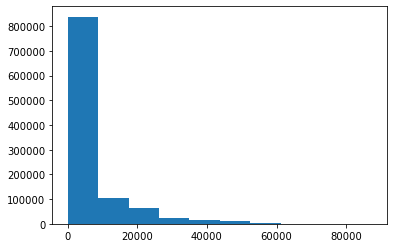

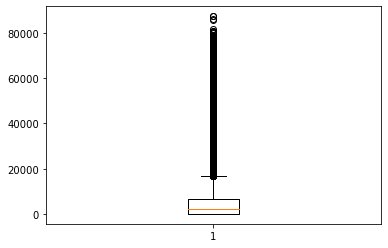

In [26]:
plt.hist(df_trans.amount)
plt.show()
plt.boxplot(df_trans.amount)
plt.show()

5. Split the amounts into bins:
a. '<100'
b. '100-250'
c. '250-500'
d. '500-1K'
e. '1K-2K'
f. '2K-4K'
g. '4K-8K'
h. '8K-15K'
i. '15K-30K'
j. '30K-60K'
k. '>60K'

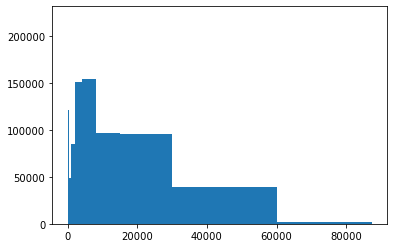

In [28]:
bins = [0,100,250,500,1000,2000,4000,8000,15000,30000,60000,max_amount]
plt.hist(df_trans.amount, bins=bins)
plt.show()

6. How many debit and credit transactions are there?


In [29]:
df_trans.type.value_counts()

Debit     651237
Credit    405083
Name: type, dtype: int64

7. What are the different types of transaction operations?

In [42]:
operations = df_trans.operation.unique()
# operations = df_trans.operation.dropna().unique()

for o in operations:
    print(o)

Credit in Cash
Collection from Another Bank
Cash Withdrawal
nan
Remittance to Another Bank
Credit Card Withdrawal


8. What are the different K Symbol values?


In [41]:
symbols = df_trans.k_symbol.unique()
# symbols = df_trans.k_symbol.dropna().unique()
for s in symbols:
    print(s)

nan
Old Age Pension
Interest Credited
Household
Payment on Statement
 
Insurance Payment
Sanction Interest
Loan Payment


9. Which top/bottom 3 banks have the highest count of transactions?

In [54]:
trans_count = df_trans.groupby("bank").trans_id.count()
print('Top 3\n{}'.format(trans_count.head(3)))
print("\n")
print('Bottom 3\n{}'.format(trans_count.tail(3)))

Top 3
bank
Bank of America                  19597
Bank of New York Mellon Corp.    21167
Capital One                      21711
Name: trans_id, dtype: int64


Bottom 3
bank
TD Bank              22285
U.S. Bancorp         19623
Wells Fargo & Co.    21499
Name: trans_id, dtype: int64


10. Which top/bottom 3 banks have the highest value of transactions?

In [56]:
trans_values = df_trans.groupby("bank").amount.sum()
print('Top 3\n{}'.format(trans_values.head(3)))
print("\n")
print('Bottom 3\n{}'.format(trans_values.tail(3)))

Top 3
bank
Bank of America                  104137717.9
Bank of New York Mellon Corp.    119141947.4
Capital One                      127567388.0
Name: amount, dtype: float64


Bottom 3
bank
TD Bank              117946247.0
U.S. Bancorp          95541231.7
Wells Fargo & Co.    125956293.3
Name: amount, dtype: float64


# Level 2: Analyzing

1. Which Month has the most transactions? Did this differ over the years? Visualize this

<AxesSubplot:xlabel='month,year'>

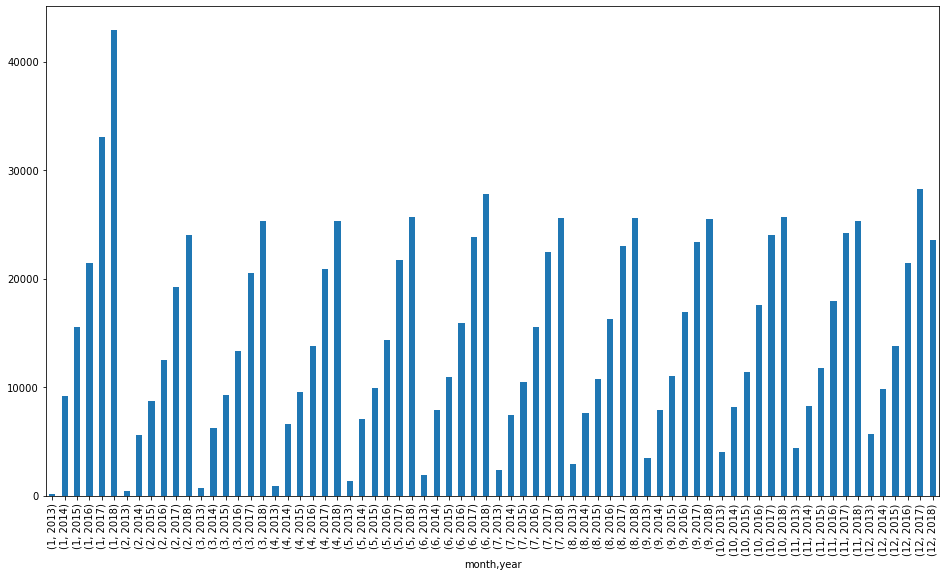

In [83]:
df_trans.groupby(["month", "year"]).trans_id.count().plot.bar(figsize=(16,9))

2. Which day of the month has the most transactions? Did this differ over the years? Visualize this.

In [95]:
temp = df_trans.groupby(["year", "month","day"]).trans_id.count()
# with open('temp.csv', "w") as f:
#     f.write(temp.to_csv())
